### Score: `[98]`

Q1. `[22]` 不错的分析，不过请按要求（也推荐）用def进行封装。

Q2. `[8]` 请添加更多解释。

Q3. `[56]` 整体完成出色，但可视化可以更加细致，时间序列时的x轴请注意标注。

Q4. `[12]` 数据未上传 并 未标注来源。

In [5]:
p1_path = '..\Assignment2_common_files\earthquakes.tsv'
p2_path = '..\Assignment2_common_files\Baoan_Weather_1998_2022.csv'

,Year,Country,Mo,Dy,Hr,Mn,Sec,Location Name,Latitude,Longitude,Mag
69,1960.0,CHILE,5.0,22.0,19.0,11.0,17.0,"CHILE: PUERTO MONTT, VALDIVIA",-38.143,-73.407,9.5
65,1964.0,USA,3.0,28.0,3.0,36.0,16.0,ALASKA,60.908,-147.339,9.2
43,2011.0,JAPAN,3.0,11.0,5.0,46.0,24.1,JAPAN: HONSHU,38.297,142.373,9.1
83,2004.0,INDONESIA,12.0,26.0,0.0,58.0,53.5,INDONESIA: SUMATRA: ACEH: OFF WEST COAST,3.295,95.982,9.1
21,1952.0,RUSSIA,11.0,4.0,16.0,58.0,27.9,RUSSIA: KAMCHATKA PENINSULA,52.755,160.057,9.0
...,...,...,...,...,...,...,...,...,...,...,...
138,1921.0,CENTRAL AFRICAN REPUBLIC,9.0,16.0,0.0,51.0,0.0,CENTRAL AFRICAN REPUBLIC: NOLA,3.800,16.300,4.8
163,2004.0,POLAND,9.0,21.0,13.0,32.0,30.8,"POLAND: SUWALKI; RUSSIA: KALININGRAD, SVETLOGORSK",54.841,19.912,4.8
161,2004.0,BURUNDI,2.0,24.0,2.0,14.0,34.0,BURUNDI: RUYAGA,-3.393,29.558,4.7
165,2008.0,CZECH REPUBLIC,11.0,22.0,22.0,27.0,55.1,CZECH REPUBLIC: KARVINA,49.914,18.455,4.1


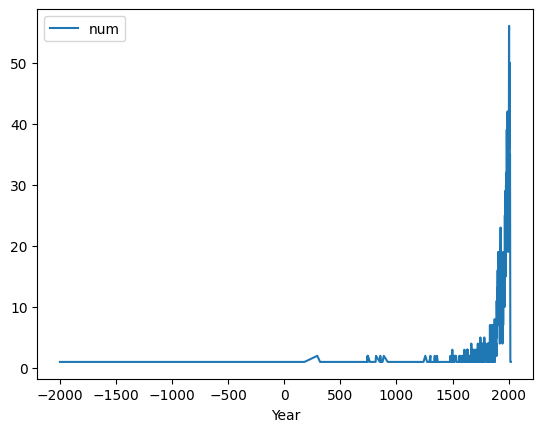

In [ ]:
import numpy as py
import pandas as pd
import matplotlib as mpl
###############     1.1       #########
sig=pd.read_csv(p1_path,sep='\t')
sig2=sig[['Country','Deaths']]
sig2=sig2.groupby(['Country']).sum().sort_values('Deaths',ascending=False)
sig2.head(20)
###############     1.2       #########
sig3=sig[['Year','Ms']]
sig3=sig3.dropna()
sig3['num']=1
sig3=sig3.groupby(['Year']).sum(['num']).reset_index()
sig3.plot(x='Year',y='num')
#绘制出来的图像似乎有地震愈来愈频发的趋势，但是我认为这个结论是不合理的。
#因为随着近现代观测手段的完善，记录到的地震本就比以前多，而且关于Ms的数据有大量缺失，将其作为唯一筛选指标不合理
# NOTE: GOOD JOB!
###############    1.3        ###########
country_name=sig['Country']
country_name = country_name.dropna()
country_name = country_name.drop_duplicates().reset_index(drop=True)
country_list = country_name.tolist()
c_l_sig=sig[['Year','Country','Mo','Dy','Hr','Mn','Sec','Location Name','Latitude','Longitude','Mag']]
#使用Mag作为衡量地震大小的标准
largest_eq=pd.DataFrame()

# NOTE: Write a function CountEq_LargestEq that returns (1) the total number of earthquakes since 2150 B.C. in a given country AND 
        # (2) date and location of the largest earthquake ever happened in this country.
        # def CountEq_LargestEq(country):
        #     your code
        #     return  total number of earthquakes, date and location of the largest earthquake
for i in range(len(country_name)):
    country_sig=c_l_sig.loc[c_l_sig['Country']==country_list[i]]
    eq_num=len(country_sig) # BUG: please report the total number of earthquakes
    country_sig=country_sig.sort_values('Mag',ascending=False)
    eq_largestMag=country_sig.iloc[0,10]
    new_row=country_sig.loc[country_sig['Mag']==eq_largestMag]
    largest_eq=pd.concat([largest_eq,new_row], ignore_index=True)
largest_eq['Mag'].astype(int)
largest_eq.sort_values(by='Mag',ascending=False)   

In [2]:
sig2.head(20)

,Deaths
Country,
CHINA,2075947.0
TURKEY,1188881.0
IRAN,1011453.0
ITALY,498418.0
SYRIA,439224.0
HAITI,323478.0
AZERBAIJAN,317219.0
JAPAN,279607.0
ARMENIA,191890.0


C:\Users\w\AppData\Local\Temp\ipykernel_13912\535846409.py:4: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  bw=pd.read_csv(p2_path)


<Axes: xlabel='YEAR,MONTH'>

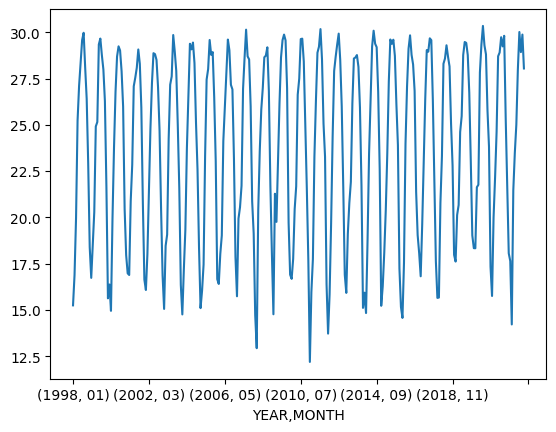

In [ ]:
# NOTE: Explain how you filter the data.

import numpy as np
import pandas as pd
import matplotlib as mpl
bw=pd.read_csv(p2_path)
bw['YEAR']=bw['DATE'].str.split('-').str[0]
bw['MONTH']=bw['DATE'].str.split('-').str[1]
bw['DAY']=bw['DATE'].str.split('-').str[2]
bull=bw['TMP'].str.contains('\+')
indexes=np.where(bw['TMP']=='+9999,9')[0].tolist()
b=len(bw)
for i in range(b):
    bw.loc[i,'TMP']=bw.loc[i,'TMP'].replace('+','').replace(',','')
#indexes=[int(i) for i in indexes]
bw['TMP']=bw['TMP'].astype(int)
for i in indexes:
    bw.loc[i,'TMP']=bw.loc[i-1,'TMP']
    #如果出现连续的99999，线性插值会出现不合理的值，于是选择最近邻插值
    # NOTE: GOOD
    
bw2=bw.groupby(['YEAR','MONTH']).mean('TMP')
bw2['TMP']=bw2['TMP']/100

# TODO: 建议横坐标改一下
bw2['TMP'].plot()

In [26]:
bw[bw['TMP'].astype(str).str.match(r'(^9999|9$)', na=False)].index.tolist()

[]

C:\Users\w\AppData\Local\Temp\ipykernel_13912\587605659.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Assignment2_common_files\ibtracs.ALL.list.v04r00.csv',


12921    PATRICIA
9087        ALLEN
11944       WILMA
11067       LINDA
10011     GILBERT
4105         None
13307      DORIAN
12337        RICK
11190       MITCH
13098        IRMA
11927        RITA
13110       MARIA
5881        JANET
8985        DAVID
8722        ANITA
12112       FELIX
12107        DEAN
11908     KATRINA
10704        JOHN
10476      ANDREW
Name: NAME, dtype: object


C:\Users\w\AppData\Local\Temp\ipykernel_13912\587605659.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['WMO_WIND']=df3['WMO_WIND'].astype(int)


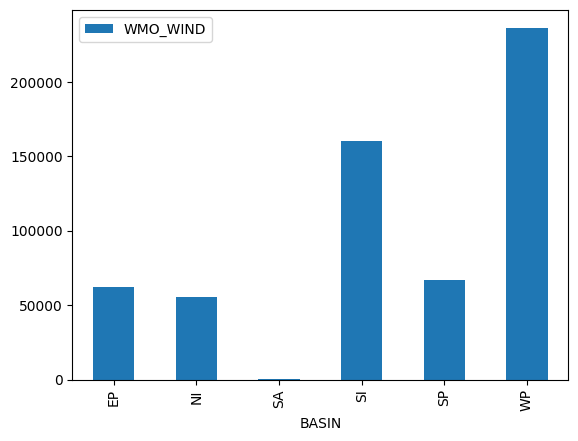

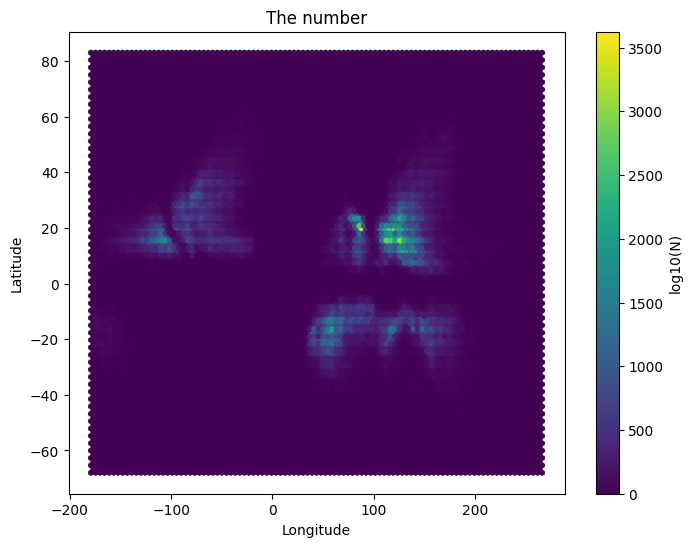

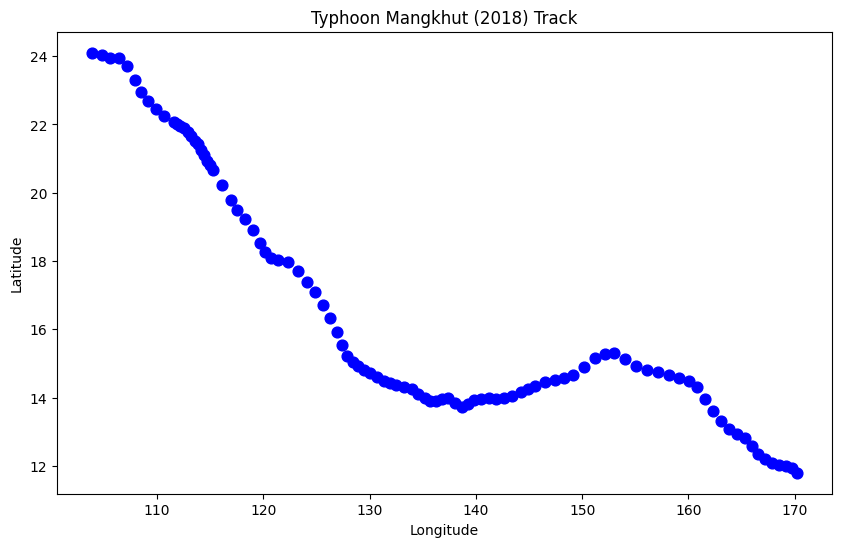

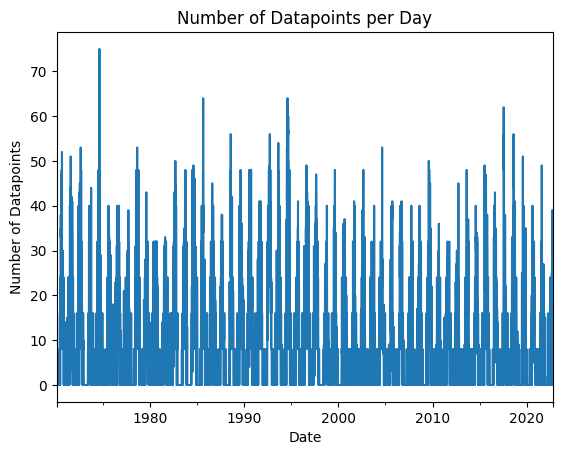

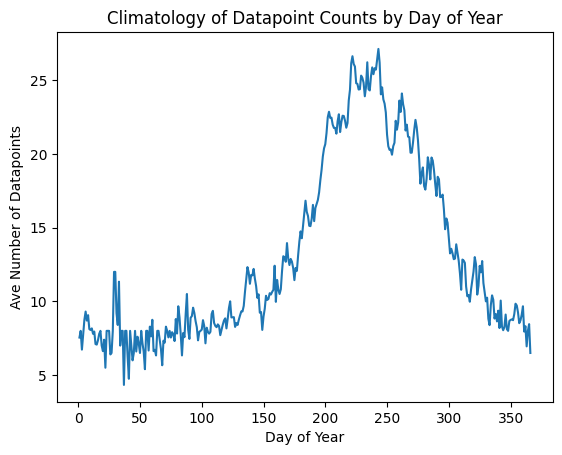

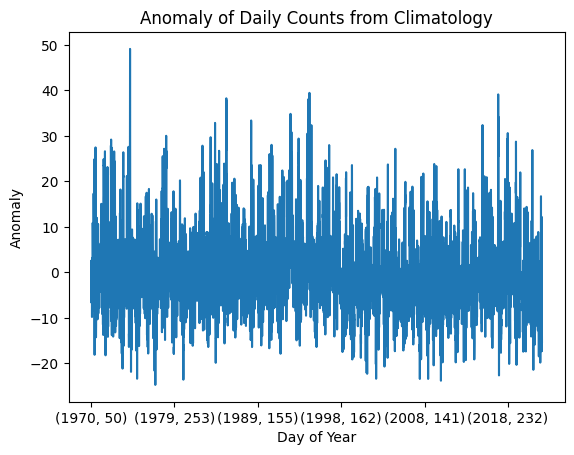

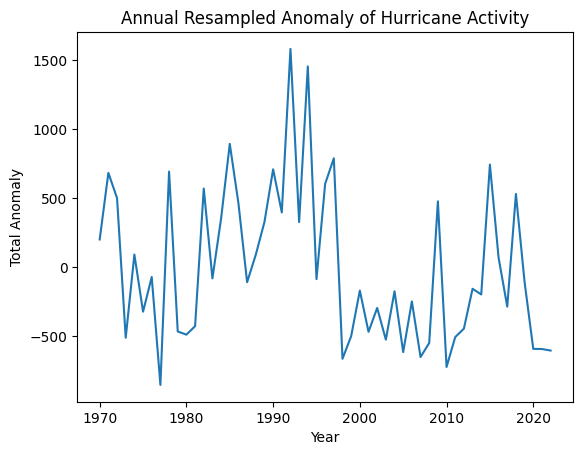

In [ ]:
import numpy as py
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
###############     3.1       #########
df = pd.read_csv('../Assignment2_common_files\ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()
df['WMO_WIND']=pd.to_numeric(df['WMO_WIND'].str.replace(' ', ''), errors='coerce')
df2=df.sort_values(['WMO_WIND'],ascending=False)
df2=df2.groupby(['SID']).first().reset_index()
top20 = df2.sort_values(by='WMO_WIND', ascending=False).head(20)
print(top20['NAME'])
###############     3.2       #########
# BUG: 
df3=top20[['NAME','WMO_WIND']]
df3['WMO_WIND']=df3['WMO_WIND'].astype(int)
df3.plot(x='NAME',y='WMO_WIND',kind='bar') # NOTE：下次可以每个小问分开写，不然df3.plot不会绘制
###############     3.3       #########
num=df.groupby(['BASIN']).count()['SID']
num.plot(kind='bar')
###############     3.4       #########
x=df['LON'].astype(int)
y=df['LAT'].astype(int)
plt.figure(figsize=(8, 6)) 
hb = plt.hexbin(x, y, gridsize=100, cmap='viridis')  
plt.colorbar(hb, label='log10(N)')  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.title('The number')  
plt.show()  
###############     3.5       #########
mangkhut=df[(df['NAME'] == 'MANGKHUT')&(df['SEASON'] ==2018)]
mangkhut_lon = mangkhut['LON']
mangkhut_lat = mangkhut['LAT']
plt.figure(figsize=(10, 6))
plt.scatter(mangkhut_lon, mangkhut_lat, color='blue', s=60)  
plt.title('Typhoon Mangkhut (2018) Track')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
###############     3.6       #########
df_1970 = df[df['SEASON'] >= 1970]
df_wp_ep = df_1970[(df_1970['BASIN'] == 'WP') | (df_1970['BASIN'] == 'EP')]
df_wp_ep.head()
###############     3.7       #########
df_wp_ep2=df_wp_ep.copy()
df_wp_ep2['Date'] = pd.to_datetime(df_wp_ep2['ISO_TIME'])
df_wp_ep2.set_index('Date', inplace=True)
perday = df_wp_ep2.resample('D').size()
perday.plot()
plt.title('Number of Datapoints per Day')
plt.xlabel('Date')
plt.ylabel('Number of Datapoints')
plt.show()
###############     3.8       #########
df_wp_ep3=df_wp_ep.copy()
df_wp_ep3['Date'] = pd.to_datetime(df_wp_ep3['ISO_TIME'])
df_wp_ep3.set_index('Date', inplace=True)
df_wp_ep3['dayofyear'] = df_wp_ep3.index.dayofyear
day_sum=df_wp_ep3.groupby([df_wp_ep3.index.year, 'dayofyear']).size()
day_ave=day_sum.groupby('dayofyear').mean()
day_ave.plot()
plt.title('Climatology of Datapoint Counts by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Ave Number of Datapoints')
plt.show()
###############     3.9       #########
piancha=day_sum-day_ave
piancha = piancha.fillna(0)
piancha.plot()
plt.title('Anomaly of Daily Counts from Climatology')
plt.xlabel('Day of Year')
plt.ylabel('Anomaly')
plt.show()
###############     3.10       #########
pc2=piancha.copy()
pc2=pc2.groupby('Date').sum()
pc2.plot()
plt.title('Annual Resampled Anomaly of Hurricane Activity')
plt.xlabel('Year')
plt.ylabel('Total Anomaly')
plt.show()

<Axes: xlabel='NAME'>

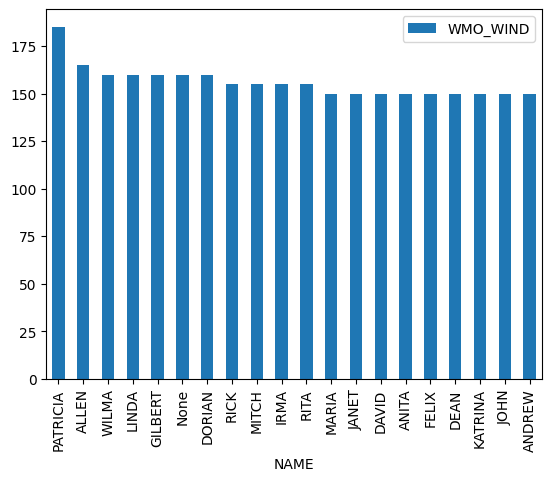

In [30]:
top20[['NAME','WMO_WIND']]
df3.plot(x='NAME',y='WMO_WIND',kind='bar')

In [ ]:
# NOTE:未上传数据集以及说明，在单元格中也没有找到输出，从代码逻辑上看应该是没问题的。

import netCDF4 as nc
import numpy as py
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
df=pd.read_csv('tsunamis.tsv',sep='\t')
df = df.dropna(how='all')
df = df.drop('Search Parameters',axis=1)
df = df.drop_duplicates()
##########  4.2#######
df2=df[['Year','Maximum Water Height (m)']]
df2=df2.dropna()
df2['num']=1
df2=df2.groupby(['Year']).sum(['num']).reset_index()
df2.plot(x='Year',y='num')
##########  4.3  #######
#最大波高大于5米的海啸数的时间序列
df3=df2.copy()
df3['Maximum Water Height (m)'].astype(int)
df3=df2[df2['Maximum Water Height (m)']>=5]
df3['num']=1
df3=df3.groupby(['Year']).sum(['num']).reset_index()
df3.plot(x='Year',y='num')
#发生海啸最多的国家
df4=df.copy()
df4 = df4.dropna(how='all')
df4['num']=1
df4=df4.groupby(['Country']).sum().sort_values('num',ascending=False)
print(df4['num'])
#发生海啸最多的月份
df5=df.copy()
df5=df5.dropna(how='all')
df5['num']=1
df5=df5.groupby(['Mo']).sum().sort_values('num',ascending=False)
print(df5['num'])

#海啸造成的死亡人数
df6=df.copy()
df6=df6.dropna(subset=['Deaths'])
df6=df6['Deaths']
df6.sum()
#每年因海啸死亡的人数
df7=df[['Year','Deaths']]
df7=df7.dropna(subset=['Deaths'])
df7=df7.groupby(['Year']).sum()
df7.plot()